In [6]:
from data.sp_data import SPData
from models import SPCplex, SPQuboBinary
from models import SPQuboBinaryBG
from evaluation.evaluation import SPEvaluation
from plotting.sp_plot import SPPlot

import networkx as nx

import neal

from run_processor import do_optimization
from datetime import datetime

from tqdm import tqdm

(answer_merge.solution) = {'x_193.0_0.0_2.5_0_-10': np.int8(0), 'x_83.0_0.0_2.5_0_-10': np.int8(0), 'x_142.0_0.0_2.5_0_-10': np.int8(0), 'x_106.0_0.0_2.5_0_-10': np.int8(0), 'x_80.0_0.0_2.5_0_-10': np.int8(0), 'x_180.0_0.0_2.5_0_-10': np.int8(0), 'x_36.0_0.0_2.5_0_-10': np.int8(1), 'x_120.0_0.0_2.5_0_-10': np.int8(0), 'x_196.0_0.0_2.5_0_-10': np.int8(0), 'x_158.0_0.0_2.5_0_-10': np.int8(0), 'x_160.0_0.0_2.5_0_-10': np.int8(1), 'x_50.0_0.0_2.5_0_-10': np.int8(0), 'x_14.0_0.0_2.5_0_-10': np.int8(0), 'x_73.0_0.0_2.5_0_-10': np.int8(0), 'x_81.0_0.0_2.5_0_-10': np.int8(1), 'x_98.0_0.0_2.5_0_-10': np.int8(0), 'x_157.0_0.0_2.5_0_-10': np.int8(1), 'x_17.0_0.0_2.5_0_-10': np.int8(0), 'x_32.0_0.0_2.5_0_-10': np.int8(1), 'x_123.0_0.0_2.5_0_-10': np.int8(0), 'x_65.0_0.0_2.5_0_-10': np.int8(0), 'x_161.0_0.0_2.5_0_-10': np.int8(0), 'x_53.0_0.0_2.5_0_-10': np.int8(1), 'x_27.0_0.0_2.5_0_-10': np.int8(0), 'x_35.0_0.0_2.5_0_-10': np.int8(0), 'x_86.0_0.0_2.5_0_-10': np.int8(1), 'x_155.0_0.0_2.5_0_-10': n

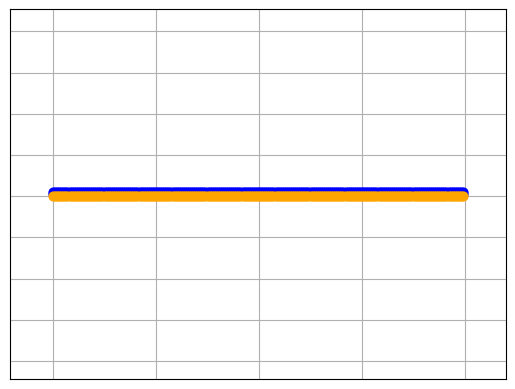

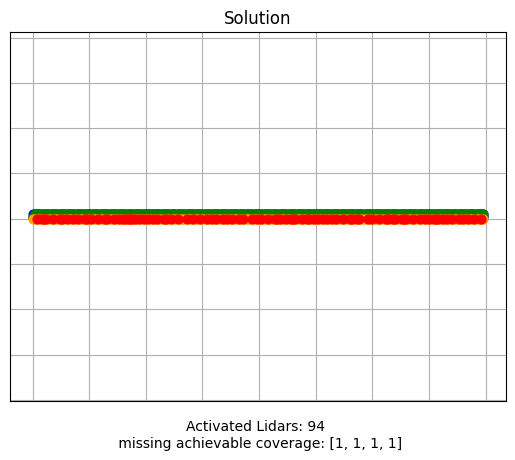

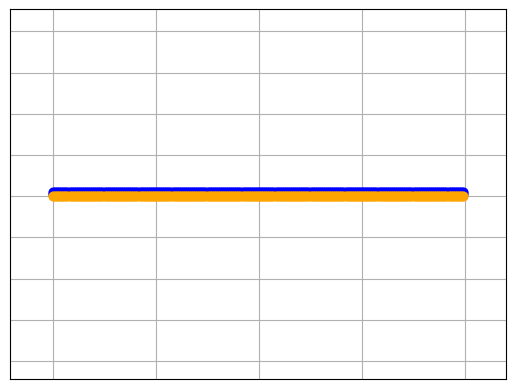

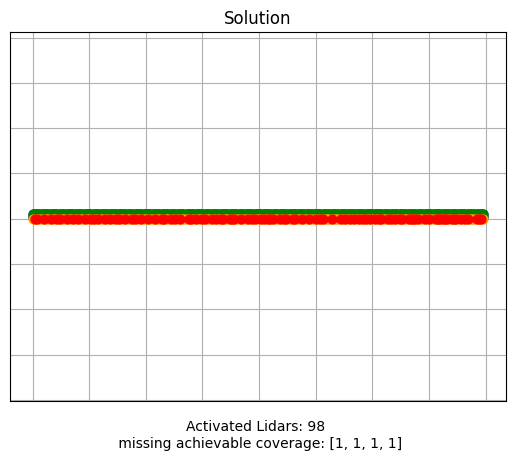

In [ ]:
# params = {"lidar_density": 0.5, "street_point_density": 0.5}
# data = SPData().create_problem_from_glb_file(**params)

params = {"version": 2, "num_cols": 200, "rad_max": 2.4}
data = SPData().gen_problem(**params) 

timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
fig = SPPlot(data).plot_problem()
fig.savefig(f"output/{timestamp_str}_problem.png")

for i in [1]:range(2):
    timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    if i == 0:
        explanation = "simulator without cut"
        # 500read
        # 1000sweep
    elif i == 1:
        explanation = "simulator with cut"
        # 500read
        # 1000sweep
    
    if explanation == "simulator without cut":
        # config = {}
        # solve_func = do_optimization
        # qubo_model_bin = SPQuboBinaryBG(data)
        config = {"num_reads":1000,"num_sweeps":1000}
        solve_func = neal.SimulatedAnnealingSampler().sample_qubo
        qubo_model_bin = SPQuboBinary(data, P1=0.6, P3=1)

        answer = qubo_model_bin.solve(solve_func, **config)

    elif explanation == "simulator with cut":
        pat_datas2 = data.partition_data(num_partitions=2)
        pat_datas = []
        for pat in pat_datas2:
            pat_datas.extend(pat.partition_data(num_partitions=2))
        merge_data = SPData().merge_data(pat_datas)
        SPPlot(merge_data).plot_problem().savefig(f"output/{timestamp_str}_merged_problem.png")

        answer_list = []
        for data_i in pat_datas:
            config = {}
            # solve_func = do_optimization
            # qubo_model_bin = SPQuboBinaryBG(data_i)
            config = {"num_reads":1000,"num_sweeps":1000}
            solve_func = neal.SimulatedAnnealingSampler().sample_qubo
            qubo_model_bin = SPQuboBinary(data, P1=0.6, P3=1)
            answer_i = qubo_model_bin.solve(solve_func, **config)
            answer_list.append(answer_i)

        # entire evaluation
        answer_merge = {
            "solution": {}
        }

        for answer_i in answer_list:
            print(f"answer.solution = {answer_i['solution']}")
            answer["solution"].update(answer_i['solution'])

    print(f"(answer_merge.solution) = {(answer['solution'])}")

    evaluation = SPEvaluation(data, answer["solution"])
    print(f"objective = {evaluation.get_objective()}")
    for constraint, violations in evaluation.check_solution().items():
        if len(violations) > 0:
            print(f"constraint {constraint} was violated {len(violations)} times")

    SPPlot(data, evaluation).plot_solution(hide_never_covered = True).savefig(f"output/{timestamp_str}_{explanation}_solution.png")
    

48

<Figure size 640x480 with 0 Axes>

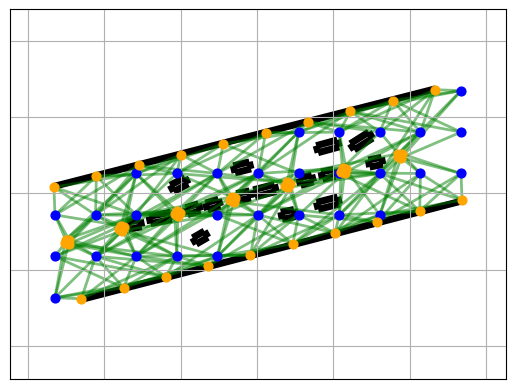

In [5]:
params = {"lidar_density": 0.1, "street_point_density": 0.1}
data = SPData().create_problem_from_glb_file(**params)

timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
fig = SPPlot(data).plot_problem()
fig.savefig(f"output/{timestamp_str}_problem.png")

len(data.listLidar3D)

In [6]:
data.assess_interactions()[4]

{'num_nodes': 114,
 'num_edges': 227,
 'num_partitions': 2,
 'nodes_per_partition': [57, 57],
 'edges_per_partition': [68, 136],
 'intra_edges': 204,
 'inter_edges': 23,
 'cut_size': 23}

In [9]:

for i in [1]:
    timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    if i == 0:
        explanation = "simulator without cut"
        # 500read
        # 1000sweep
    elif i == 1:
        explanation = "simulator with cut"
        # 500read
        # 1000sweep
    
    if explanation == "simulator without cut":
        # config = {}
        # solve_func = do_optimization
        # qubo_model_bin = SPQuboBinaryBG(data)
        # config = {"num_reads":500,"num_sweeps":1000}
        # solve_func = neal.SimulatedAnnealingSampler().sample_qubo
        # qubo_model_bin = SPQuboBinary(data, P1=0.8, P3=1)

        answer = qubo_model_bin.solve(solve_func, **config)

    elif explanation == "simulator with cut":
        pat_datas = data.partition_data()
        # merge_data = SPData().merge_data(pat_datas)
        # SPPlot(merge_data).plot_problem().savefig(f"output/{timestamp_str}_merged_problem.png")

        answer_list = []
        for data_i in pat_datas:
            config = {}
            solve_func = do_optimization
            qubo_model_bin = SPQuboBinaryBG(data_i, P1=0.8, P3=1)
            # config = {"num_reads":500,"num_sweeps":1000}
            # solve_func = neal.SimulatedAnnealingSampler().sample_qubo
            # qubo_model_bin = SPQuboBinary(data, P1=0.8, P3=1)
            answer_i = qubo_model_bin.solve(solve_func, **config)
            answer_list.append(answer_i)

        # entire evaluation
        answer_merge = {
            "solution": {}
        }

        for answer_i in answer_list:
            print(f"answer.solution = {answer_i['solution']}")
            answer_merge["solution"].update(answer_i['solution'])

    print(f"(answer_merge.solution) = {(answer_merge['solution'])}")

    evaluation = SPEvaluation(data, answer_merge["solution"])
    print(f"objective = {evaluation.get_objective()}")
    for constraint, violations in evaluation.check_solution().items():
        if len(violations) > 0:
            print(f"constraint {constraint} was violated {len(violations)} times")

    SPPlot(data, evaluation).plot_solution(hide_never_covered = True).savefig(f"output/{timestamp_str}_{explanation}_solution.png")
    

Solving the QUBO using the QA algorithm and the D-Wave backend


KeyboardInterrupt: 

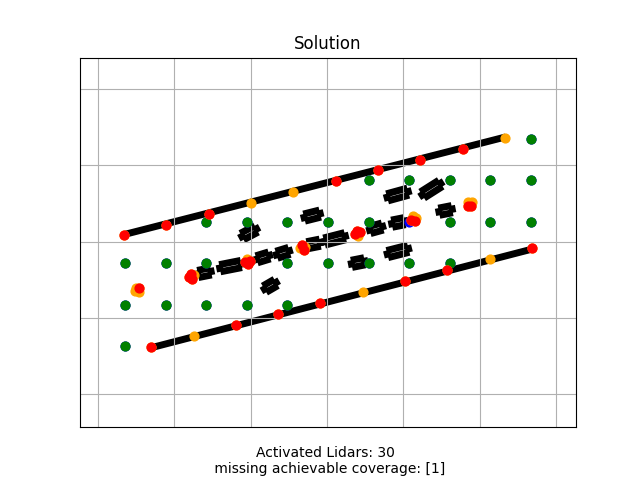

In [8]:
from IPython.display import Image, display

display(Image(filename='output/20241201_000048_simulator with cut_solution.png'))

<Figure size 640x480 with 0 Axes>

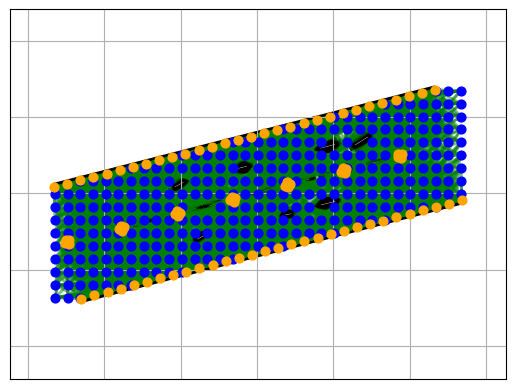

In [2]:
params = {"lidar_density": 0.3, "street_point_density": 0.3}
data = SPData().create_problem_from_glb_file(**params)

timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
fig = SPPlot(data).plot_problem()
fig.savefig(f"output/{timestamp_str}_problem.png")


In [3]:
data.assess_interactions()[4]

{'num_nodes': 649,
 'num_edges': 4424,
 'num_partitions': 2,
 'nodes_per_partition': [324, 325],
 'edges_per_partition': [1841, 2202],
 'intra_edges': 4043,
 'inter_edges': 381,
 'cut_size': 381}

In [4]:
pat_datas2 = data.partition_data(num_partitions=2)
pat_datas4 = []
print(f"finished partitioning into 2")
for pat in pat_datas2:
    pat_datas4.extend(pat.partition_data(num_partitions=2))
print(f"finished partitioning into 4")
pat_datas8 = []
for pat in pat_datas4:
    pat_datas8.extend(pat.partition_data(num_partitions=2))
print(f"finished partitioning into 8")


finished partitioning into 2
finished partitioning into 4
finished partitioning into 8


100%|██████████| 8/8 [02:48<00:00, 21.08s/it]


answer.solution = {'x_36.98116792465799_10.392211265762938_2.5_-38.3199684916824_-30': np.int8(1), 'x_-50.12108811060976_-12.10130109779965_2.5_-34.37946489729434_-30': np.int8(0), 'x_5.327476907990622_16.602966616106492_2.5_165.6513206767533_-30': np.int8(1), 'x_8.207368135006256_1.5780849505202381_2.5_164.63415733473838_-30': np.int8(1), 'x_-20.71531353412392_-5.884685126613852_2.5_167.02952023611817_-30': np.int8(0), 'x_-49.146405775895985_-12.2391703078878_2.5_55.62053510270558_-30': np.int8(1), 'x_-42.85934740190383_4.276689454821388_2.5_165.6513206767533_-30': np.int8(0), 'x_19.314434357065167_-10.667710430463751_2.5_-14.51611771349171_-30': np.int8(0), 'x_15.875106371046783_-11.558213418624725_2.5_-14.51611771349171_-30': np.int8(0), 'x_-4.998271158415328_13.961621510116828_2.5_165.6513206767533_-30': np.int8(1), 'x_-35.649336780869675_-8.459548034487945_2.5_-17.572862172336116_-30': np.int8(1), 'x_46.63046917361444_27.168347040065154_2.5_165.6513206767533_-30': np.int8(1), 'x_-

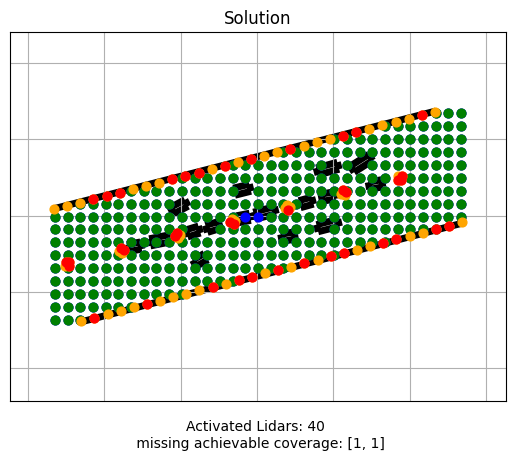

In [ ]:

for i in [1]:
    timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    if i == 0:
        explanation = "simulator without cut"
        # 500read
        # 1000sweep
    elif i == 1:
        explanation = "simulator with cut"
        # 500read
        # 1000sweep
    
    if explanation == "simulator without cut":
        # config = {}
        # solve_func = do_optimization
        # qubo_model_bin = SPQuboBinaryBG(data)
        # config = {"num_reads":500,"num_sweeps":1000}
        # solve_func = neal.SimulatedAnnealingSampler().sample_qubo
        # qubo_model_bin = SPQuboBinary(data, P1=0.8, P3=1)

        answer = qubo_model_bin.solve(solve_func, **config)

    elif explanation == "simulator with cut":
        for data_i in tqdm(pat_datas8):
            config = {}
            # solve_func = do_optimization
            # qubo_model_bin = SPQuboBinaryBG(data_i)
            config = {"num_reads":500,"num_sweeps":1000}
            solve_func = neal.SimulatedAnnealingSampler().sample_qubo
            qubo_model_bin = SPQuboBinary(data, P1=0.8, P3=1)
            answer_i = qubo_model_bin.solve(solve_func, **config)
            answer_list.append(answer_i)

        # entire evaluation
        answer_merge = {
            "solution": {}
        }

        for answer_i in answer_list:
            print(f"answer.solution = {answer_i['solution']}")
            answer_merge["solution"].update(answer_i['solution'])

    print(f"(answer_merge.solution) = {(answer_merge['solution'])}")

    evaluation = SPEvaluation(data, answer_merge["solution"])
    print(f"objective = {evaluation.get_objective()}")
    for constraint, violations in evaluation.check_solution().items():
        if len(violations) > 0:
            print(f"constraint {constraint} was violated {len(violations)} times")

    SPPlot(data, evaluation).plot_solution(hide_never_covered = True).savefig(f"output/{timestamp_str}_{explanation}_solution.png")
    

100%|██████████| 4/4 [01:28<00:00, 22.00s/it]


answer.solution = {'x_36.98116792465799_10.392211265762938_2.5_-38.3199684916824_-30': np.int8(1), 'x_-50.12108811060976_-12.10130109779965_2.5_-34.37946489729434_-30': np.int8(0), 'x_5.327476907990622_16.602966616106492_2.5_165.6513206767533_-30': np.int8(1), 'x_8.207368135006256_1.5780849505202381_2.5_164.63415733473838_-30': np.int8(1), 'x_-20.71531353412392_-5.884685126613852_2.5_167.02952023611817_-30': np.int8(0), 'x_-49.146405775895985_-12.2391703078878_2.5_55.62053510270558_-30': np.int8(1), 'x_-42.85934740190383_4.276689454821388_2.5_165.6513206767533_-30': np.int8(0), 'x_19.314434357065167_-10.667710430463751_2.5_-14.51611771349171_-30': np.int8(0), 'x_15.875106371046783_-11.558213418624725_2.5_-14.51611771349171_-30': np.int8(0), 'x_-4.998271158415328_13.961621510116828_2.5_165.6513206767533_-30': np.int8(1), 'x_-35.649336780869675_-8.459548034487945_2.5_-17.572862172336116_-30': np.int8(1), 'x_46.63046917361444_27.168347040065154_2.5_165.6513206767533_-30': np.int8(1), 'x_-

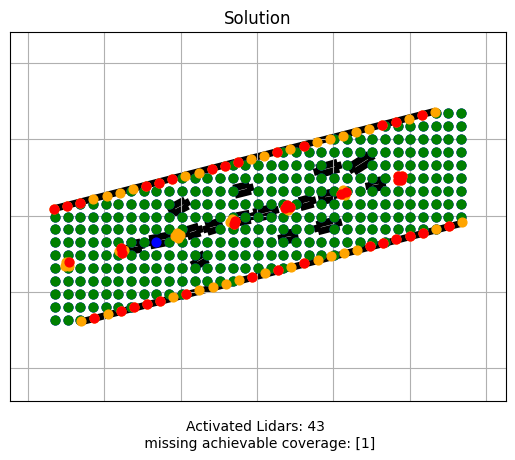

In [ ]:

for i in [1]:
    timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    if i == 0:
        explanation = "simulator without cut"
        # 500read
        # 1000sweep
    elif i == 1:
        explanation = "simulator with cut"
        # 500read
        # 1000sweep
    
    if explanation == "simulator without cut":
        # config = {}
        # solve_func = do_optimization
        # qubo_model_bin = SPQuboBinaryBG(data)
        # config = {"num_reads":500,"num_sweeps":1000}
        # solve_func = neal.SimulatedAnnealingSampler().sample_qubo
        # qubo_model_bin = SPQuboBinary(data, P1=0.8, P3=1)

        answer = qubo_model_bin.solve(solve_func, **config)

    elif explanation == "simulator with cut":
        for data_i in tqdm(pat_datas4):
            config = {}
            # solve_func = do_optimization
            # qubo_model_bin = SPQuboBinaryBG(data_i)
            config = {"num_reads":500,"num_sweeps":1000}
            solve_func = neal.SimulatedAnnealingSampler().sample_qubo
            qubo_model_bin = SPQuboBinary(data, P1=0.3, P3=1)
            answer_i = qubo_model_bin.solve(solve_func, **config)
            answer_list.append(answer_i)
            break

        # entire evaluation
        answer_merge = {
            "solution": {}
        }

        for answer_i in answer_list:
            print(f"answer.solution = {answer_i['solution']}")
            answer_merge["solution"].update(answer_i['solution'])

    print(f"(answer_merge.solution) = {(answer_merge['solution'])}")

    evaluation = SPEvaluation(data, answer_merge["solution"])
    print(f"objective = {evaluation.get_objective()}")
    for constraint, violations in evaluation.check_solution().items():
        if len(violations) > 0:
            print(f"constraint {constraint} was violated {len(violations)} times")

    SPPlot(data, evaluation).plot_solution(hide_never_covered = True).savefig(f"output/{timestamp_str}_{explanation}_solution.png")
    

(answer_merge.solution) = {'x_36.98116792465799_10.392211265762938_2.5_-38.3199684916824_-30': np.int8(1), 'x_-50.12108811060976_-12.10130109779965_2.5_-34.37946489729434_-30': np.int8(0), 'x_5.327476907990622_16.602966616106492_2.5_165.6513206767533_-30': np.int8(0), 'x_8.207368135006256_1.5780849505202381_2.5_164.63415733473838_-30': np.int8(1), 'x_-20.71531353412392_-5.884685126613852_2.5_167.02952023611817_-30': np.int8(0), 'x_-49.146405775895985_-12.2391703078878_2.5_55.62053510270558_-30': np.int8(1), 'x_-42.85934740190383_4.276689454821388_2.5_165.6513206767533_-30': np.int8(1), 'x_19.314434357065167_-10.667710430463751_2.5_-14.51611771349171_-30': np.int8(1), 'x_15.875106371046783_-11.558213418624725_2.5_-14.51611771349171_-30': np.int8(0), 'x_-4.998271158415328_13.961621510116828_2.5_165.6513206767533_-30': np.int8(1), 'x_-35.649336780869675_-8.459548034487945_2.5_-17.572862172336116_-30': np.int8(1), 'x_46.63046917361444_27.168347040065154_2.5_165.6513206767533_-30': np.int8(

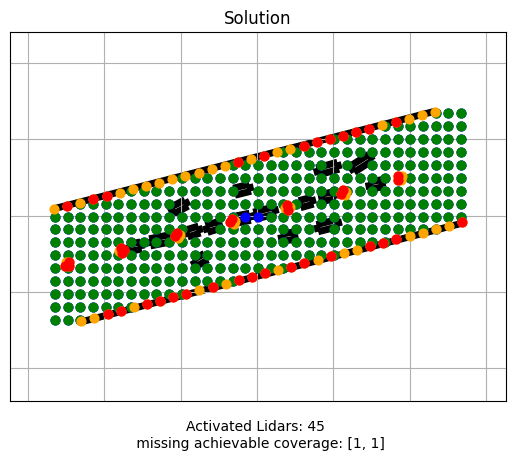

In [11]:

for i in [0]:
    timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    if i == 0:
        explanation = "simulator without cut"
        # 500read
        # 1000sweep
    elif i == 1:
        explanation = "simulator with cut"
        # 500read
        # 1000sweep
    
    if explanation == "simulator without cut":
        # config = {}
        # solve_func = do_optimization
        # qubo_model_bin = SPQuboBinaryBG(data)
        # config = {"num_reads":500,"num_sweeps":1000}
        # solve_func = neal.SimulatedAnnealingSampler().sample_qubo
        # qubo_model_bin = SPQuboBinary(data, P1=0.8, P3=1)

        answer = qubo_model_bin.solve(solve_func, **config)

    elif explanation == "simulator with cut":
        for data_i in tqdm(pat_datas4):
            config = {}
            # solve_func = do_optimization
            # qubo_model_bin = SPQuboBinaryBG(data_i)
            config = {"num_reads":500,"num_sweeps":1000}
            solve_func = neal.SimulatedAnnealingSampler().sample_qubo
            qubo_model_bin = SPQuboBinary(data, P1=0.3, P3=1)
            answer_i = qubo_model_bin.solve(solve_func, **config)
            answer_list.append(answer_i)

        # entire evaluation
        answer_merge = {
            "solution": {}
        }

        for answer_i in answer_list:
            print(f"answer.solution = {answer_i['solution']}")
            answer_merge["solution"].update(answer_i['solution'])

    print(f"(answer_merge.solution) = {(answer_merge['solution'])}")

    evaluation = SPEvaluation(data, answer_merge["solution"])
    print(f"objective = {evaluation.get_objective()}")
    for constraint, violations in evaluation.check_solution().items():
        if len(violations) > 0:
            print(f"constraint {constraint} was violated {len(violations)} times")

    SPPlot(data, evaluation).plot_solution(hide_never_covered = True).savefig(f"output/{timestamp_str}_{explanation}_solution.png")
    